# Project 5: Wrangling And Analyzing Twitter Data

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#Data_Wrangling)
    - [Data Gathering](#Data_Gathering)
    - [Assessing data](#assess)
    - [Cleaning data](#clean)
- [Analysis](#analysis)
- [Conclusion](#conc)



<a id='intro'></a>
# Introduction :

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Our goal : 
 Wrangle WeRateDogs Twitter data to create an interesting and trustworthy analysis and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for the Data

<a id='Data_Wrangling'></a>
# Data Wrangling 

 Which consists of:

   - Gathering downloadable data .
   - Assessing data
   - Cleaning data


<a id='Data_Gathering'></a>
## Data Gathering

In this project, gathering data involved:

- Manually downloading WeRateDogs’ Twitter archive from twitter_archive_enhanced.csv 

- Programmatically downloading image predictions using Requests.https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- Programmatically downloading missing properties using Twitter’s API for Python . tweet_json.txt

In [1]:
import pandas as pd
import numpy as np
import wptools
import os
import requests
from PIL import Image
from io import BytesIO
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_1=pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
df_1.shape

(2356, 17)

In [5]:
import requests
r = requests.get('https://api.github.com/repos/psf/requests')
r.json()["description"]


'A simple, yet elegant HTTP library.'

In [6]:
#Getting the image prediction data from URL
tsv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
im_pred=pd.read_csv(tsv_url,sep='\t')

In [7]:
im_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### setting up Twitter API

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start_time = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end_time = timer()
print('Execution time: {0:.2f}s.'.format(end_time - start_time))


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [9]:
# Reading data from 'tweet_json.txt' file line by line and creating a dataframe

tweet_data = {'tweet_id': [], 'retweet_count': [], 'favorite_count': [], 'retweet': []}
try:
    with open('tweet_json.txt', 'r') as file:
        for line in file:
            tweet = json.loads(line)
            tweet_data['tweet_id'].append(tweet['id_str'])
            tweet_data['retweet_count'].append(tweet['retweet_count'])
            tweet_data['favorite_count'].append(tweet['favorite_count'])
            try:
                # The retweet text in its truncated form will be returned if
                # Checking retweets
                retweet_checker = tweet['retweeted_status']
                tweet_data['retweet'].append(True)
            except KeyError:
                #  not a retweet 
                tweet_data['retweet'].append(False)
    
    print('File red successfully!')
    tweet_json = pd.DataFrame(tweet_data)
except FileNotFoundError:
    print('Failed to read from a file!')

File red successfully!


<a id='assess'></a>
## Assessing Data

In order to find problems from the data by using programmatic techniques and vizualizations. The goal was to detect and document at least 8 quality and 2 tidiness issues. 
  - Invalid column datatypes.

  - Id columns (such as tweet_id, and in_reply_to_status_id) were int and float instead of string.

  - Timestamp columns (such as timestamp and retweeted_status_timestamp) were string instead of datetime.
  
  - All lowercase names were inappropriate.

  - Inconsistent and inaccurate dog names.

  - Inaccurate ratings and notations.
  
  - Some dog names (such as ‘a’, and ‘such’) were in lowercase, while others were in uppercase.

  - Few names (such as O’Malley and Al Cabone) were represented by their beginning characters.

  - Inaccurate dog stages.

  - Null dog stages were represented using the string None instead of Python’s None.

  - In some tweets, multiple stages were used to represent a single dog.

 



In [10]:
# Assessing columns datatypes
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Getting lowercase dog names + extracting unique ones.
display(df_1[df_1.name.str.islower() == True
                       ].name.unique())

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [12]:
# Getting short dog names that are not in lowercase.
short_names = df_1[(df_1.name.str.len() < 3) & 
                              (df_1.name.str.islower() == False)
                             ]['name'].unique()

# From this list, names at 775 and 820 are inacurate.
display(df_1[df_1.name.isin(short_names)]
        [['text', 'name']].loc[np.r_[775, 820], :])

,text,name
775,This is O'Malley. That is how he sleeps. Doesn...,O
820,Meet Al Cabone. He's a gangsta puppa. Rather h...,Al


In [13]:
# Get unique values that represent dog stages.
# Each represent null data as a string None.
display(df_1.doggo.unique())
display(df_1.floofer.unique())
display(df_1.pupper.unique())
display(df_1.puppo.unique())

array(['None', 'doggo'], dtype=object)

array(['None', 'floofer'], dtype=object)

array(['None', 'pupper'], dtype=object)

array(['None', 'puppo'], dtype=object)

In [14]:
# Get dogs with multiple assigned stage
multiple_dog_stage = ((((df_1.doggo == 'doggo') & 
                        (df_1.floofer == 'floofer')) | 
                      ((df_1.pupper == 'pupper') & 
                       (df_1.puppo == 'puppo'))) |
                      (((df_1.doggo == 'doggo') | 
                        (df_1.floofer == 'floofer')) & 
                      ((df_1.pupper == 'pupper') | 
                       (df_1.puppo == 'puppo'))))

display(df_1[multiple_dog_stage][
    ['tweet_id', 'text', 'doggo', 'floofer', 'pupper', 'puppo']].head(2))

,tweet_id,text,doggo,floofer,pupper,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMa...,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but i...",doggo,floofer,None,None


In [15]:
# Get tweets with rating denominator < 10 and numerator > 17.
# Some of these rating_numerator/rating_denominator are inaccurate.
display(df_1[df_1.rating_denominator < 10]
        [['text', 'rating_numerator', 'rating_denominator']].tail())
display(df_1[df_1.rating_numerator > 17]
        [['text', 'rating_numerator', 'rating_denominator']]
        .loc[np.r_[340, 763], :])

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2


,text,rating_numerator,rating_denominator
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10



**Quality Issues in the Json Data**

162 retweets, which are not useful, were extracted through the API.

Inconsistent tweet id datatypes.
  - In tweet_json, tweet ids were represented as strings, but twitter_archive used int.

Incomplete records.
  - Twitter archive had 2356 records, but tweet_json had 2330.



In [16]:
# Since only original tweets are usefull in our case,
# 179 of the retweets need to be removed.
display(tweet_json.retweet.value_counts())

# This summary shows that, tweet_id is represented using string
tweet_json.info()



False    2168
True      163
Name: retweet, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
retweet           2331 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 57.0+ KB


**Length of twitter_archive is 2356, but tweet_json contains 2330 records.**

**Quality Issues in the Json Data**

Inconsistent tweet id datatypes.
        
   - In im_pred used int but in tweet_json, tweet ids were strings .



In [17]:
# Display the datatype of tweet_id.
print(im_pred.tweet_id.dtype)

# Display the difference in the number of observations.
len_image_predictions = len(im_pred.tweet_id.unique())
len_image_predictions

int64


2075

**Length of twitter_archive is 2356, but im_pred contains 2075 records.(missing records)**


**Tidiness Issues**

   * Doggo, floofer, pupper, and puppo Variables could be converted to dog_stage variable.

   * Tweet json and image_predictions could be merged with the twitter_archive.



In [18]:
display(df_1[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo'
                        ]].head())
display(tweet_json.head())

display(im_pred[['tweet_id', 'p1', 'p1_conf', 'p1_dog', 
                           'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'
                          ]].head())

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None


,tweet_id,retweet_count,favorite_count,retweet
0,892420643555336193,7689,36108,False
1,892177421306343426,5688,31148,False
2,891815181378084864,3771,23457,False
3,891689557279858688,7856,39394,False
4,891327558926688256,8460,37623,False


,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



<a id='clean'></a>
# Cleaning Data


   - Defining
   
   - fixing previous issues by coding .

   - Testing

   - conclude from results .

## Make a copy of the data

In [19]:
df_1_copy = df_1.copy()
tweet_json_copy = tweet_json.copy()
im_pred_copy = im_pred.copy()

### Quality Issues in the Twitter Archive
#### Define :

   - Apply DataFrame.astype() function on each of Id. variables to convert them to string.

   - Apply Pandas.to_datetime() function on each of Timestamp variables.
   
#### Code : 

In [20]:
# Simple casting to int would not handle the nan,
# So use pandas INT64 datatype
df_1 = df_1.astype({
    'tweet_id': str,
    'in_reply_to_status_id': str, 
    'in_reply_to_user_id': str,
    'retweeted_status_id': str,
    'retweeted_status_user_id': str})

# Convert timestamps into datetime
df_1.timestamp = pd.to_datetime(df_1.timestamp)
df_1.retweeted_status_timestamp = pd.to_datetime(
    df_1.retweeted_status_timestamp)

**Test**

In [21]:
# Datatype of id columns should be int64,
# Datatype of timestamp columns should be datetime64,
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

**Define**

   - Get lowercase names using Series.str.islower() and set to None.

   - Assign O'Malley and Al Cabone to name at indices 775 and 820.
    
**Code**


In [22]:
# Remove lowercase names
mask = (df_1.name.str.islower() == True)
df_1.loc[mask, 'name'] = None

# Fix misspelled names
df_1.iloc[np.r_[775, 820], 12] = "O\'Malley", "Al Cabone"

**Test** : 

In [23]:
# Number of rows with lowercase name should be 0
print(len(df_1[df_1.name.str.islower() == True]))

# Names at these  indexes should be O'Malley and Al Cabone
df_1.iloc[np.r_[775, 820], 12]



0


775     O'Malley
820    Al Cabone
Name: name, dtype: object


**Define**

   - Get rows where values of doggo, floofer, pupper, or puppo were 'None'; then set them to None.

   - Get rows with indices 191, 200, 460, 575, and 705; then set the invalid stages to None.

   - Get rows with indices 531, 565, 733, 778, 822, 889, 956, 1063, and 1113; then set doggo to multiple_stages and set pupper to None.
   
**Code**

In [24]:
# Fix empty dog stages represented as a string None
df_1.loc[df_1.doggo == 'None', 'doggo'] = None
df_1.loc[df_1.floofer == 'None', 'floofer'] = None
df_1.loc[df_1.pupper == 'None', 'pupper'] = None
df_1.loc[df_1.puppo == 'None', 'puppo'] = None

# Fix multiple stages given for a single dog
# by setting the incorrect ones to None
df_1.iloc[191, -4] = None
df_1.iloc[200, -4] = None
df_1.iloc[460, -2] = None
df_1.iloc[575, -4] = None
df_1.iloc[705, -2] = None

# For tweets mentioning multiple dogs, 
# the doggo stage was set to multiple_stages. 
# But, all other stages were set to None.
df_1.iloc[np.r_[531, 565, 733, 778, 822, 889, 956, 1063, 1113], 
                     np.r_[-4, -2]] = 'multiple_stages', None

**Test** : 

In [25]:
# The number of non-null values in the last 4 columns
# should be less than 2356. This is because the string None
# is now converted to NULL.
df_1.iloc[:, -4:].info()

# Value of doggo for the first two rows, 
# and also the forth row should be None.
# Value of pupper for the third and last rows should be None
print('\n', df_1.iloc[np.r_[191, 200, 460, 575, 705],
                                 np.r_[-4, -2]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      94 non-null object
floofer    10 non-null object
pupper     246 non-null object
puppo      30 non-null object
dtypes: object(4)
memory usage: 73.7+ KB

      doggo  pupper
191   None    None
200   None    None
460  doggo    None
575   None  pupper
705  doggo    None


**Define**

   - Extract rating_numerator and rating_denominator from the text variable .
   - If a text contains multiple ratings, then consider the first as the correct value; then replace it with the appropriate vaues latter if needed.

   - Fix inappropriate values using thier indices by setting them to None.


In [26]:
# Fix issues associated with rating numerator and denominator

# Get all the possible ratings from a text using regular expressions
idx = pd.IndexSlice
all_numerators_vs_denominators = df_1.text.str.extractall(
    r'(?P<rating_numerator>\d+(?:\.\d+)?)\/(?P<rating_denominator>\d+)')

# Assume all ratings that appeared first as correct ratings
first_rating = all_numerators_vs_denominators.loc[idx[:, 0], :]

# Get ratings that appeared second, these are the actual correct ratings, 
correct_ratings = all_numerators_vs_denominators.loc[idx[
    np.r_[313, 784, 1068, 1165, 1202, 2335], 1], :]

# Drop the added multi-level index
correct_ratings = correct_ratings.reset_index(level=1, drop=True)
first_rating = first_rating.reset_index(level=1, drop=True)

# Replace values that were assumed to be correct, but are not, 
# with the actual correct values
first_rating.iloc[correct_ratings.index, :] = correct_ratings

# Replace previous columns with the new ones
df_1.iloc[:, np.r_[10, 11]] = first_rating

# Set incorrect values to null
df_1.iloc[np.r_[342, 516], np.r_[10, 11]] = np.nan, np.nan

# Transform Cast rating numerator and denominator to float
df_1 = df_1.astype({
    'rating_numerator': float, 
    'rating_denominator': float})

In [30]:
# If correct, these values should have correct values.
# Records at 342, 516 should have null values.
display(df_1.iloc[np.r_[313, 1165, 2335, 784, 1068, 1202, 
                           340, 695, 1662, 763, 1712], np.r_[10, 11]])

display(df_1.iloc[np.r_[342, 516], np.r_[10, 11]])

,rating_numerator,rating_denominator
313,13.00,10.0
1167,11.00,10.0
2337,10.00,10.0
786,12.00,10.0
1070,9.00,10.0
1204,11.00,10.0
340,9.75,10.0
697,11.00,10.0
1664,12.00,10.0
765,3.00,10.0


,rating_numerator,rating_denominator
343,12.0,10.0
518,11.0,10.0


**Define**

   - Drop rows with null rating_numerator or rating_denominator, by selecting only non-null values.


**Code**

In [31]:
# Drop rows with NAN rating
df_1 = df_1[df_1.rating_numerator.notna() & 
                                  df_1.rating_denominator.notna()]

**Test**

In [32]:
# The result should be 0
len(df_1[df_1.rating_numerator.isna() | 
                    df_1.rating_denominator.isna()])

0

### Tidiness Issues


**Define**

   - Convert doggo, floofer, pupper, and puppo into dog_stage using DataFrame.melt().

   - Since DataFrame.melt() creates multiple copies of each single row, drop duplicates by selecting non-duplicated records.


**Code**

In [34]:
# Make a copy of the df_1 data
test_df_1 = df_1.copy()

# Melt the last 4 columns
df_1 = df_1.melt(id_vars=df_1.columns[:-4], 
                                       value_name='dog_stage')

# Drop the default variable created 
df_1.drop(columns='variable', inplace=True)

# Get records having a value for dog_stage
dog_stage_data = df_1[(df_1.dog_stage.isna() == False)]

# Get records with a None value for dog_stage, and
# Having a different tweet_id than those in dog_stage_data
dog_stage_None_data = df_1[(
    df_1.dog_stage.isna() == True) & 
    (df_1.tweet_id.isin(dog_stage_data.tweet_id) == False)]

# Drop any duplication from dog_stage_None_data
dog_stage_None_data = dog_stage_None_data[
    dog_stage_None_data.tweet_id.duplicated() == False]

# Concatenate dog_stage_None_data and dog_stage_data
df_1 = dog_stage_None_data.append(dog_stage_data)

**Test**

In [35]:
# If correct, sum of non-null values in the last 4 columns 
# of test_twitter_archive will be 9 records less than the non-null values
# in dog_stage column of df_1
display(test_df_1.iloc[:, -4:].count())

display(df_1.dog_stage.value_counts())

doggo       94
floofer     10
pupper     246
puppo       30
dtype: int64

pupper             246
doggo               85
puppo               30
floofer             10
multiple_stages      9
Name: dog_stage, dtype: int64


### Quality Issues in the Json Data

***Define***

   - Drop retweets by selecting only tweets.


**Code**

In [36]:
# Drop retweets
tweet_json = tweet_json[tweet_json.retweet == False]

**Test**

In [37]:
# If correct, 0 
print((tweet_json.retweet == True).sum())

0



### Quality Issues in the Image Predictions
**Define**

   - Convert datatype of tweet_id variable from int to string .

**Code**


In [38]:
# Convert tweet_id from int to string
im_pred.tweet_id = im_pred.tweet_id.astype(str)

**Test**

In [39]:
# Print datatype of tweet_id variable in image_predictions
print(im_pred.tweet_id.dtype)

object



### Tidiness Issues in the Json Data and Image Predictions
**Define**

   - Merge df_1 and tweet_json into twitter_archive_master .

   - Merge twitter_archive_master and im_pred using .

**Code**


In [40]:
# Merge tweet_json with df_1, and
# Remove unneccessary columns from both tables
twitter_archive_master = pd.merge(left=
                                  df_1.iloc[:, np.r_[0, 3:6, 9:14]], 
                                  right=tweet_json.iloc[:,:-1], on='tweet_id', 
                                  how='inner')

# Merge image_predictions with df_1, and
# Remove unneccessary columns from both tables
twitter_archive_master = pd.merge(left=
                                  twitter_archive_master, 
                                  right=im_pred, on='tweet_id', 
                                  how='inner')

**Test**

In [41]:
# If correct, retweet_count and favorite_count should be the last columns.
print(twitter_archive_master.columns.tolist())

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


### Storing Data

   - Storing data in a CSV file

In [42]:
# Create a clean master dataset
twitter_archive_master.to_csv('My_data/twitter_archive_master.csv', index=False)


<a id='analysis'></a>

## Analysis

The cleaned dataset contains 1993 tweets between November 15, 2015 and August 1, 2017. Each record of a tweet contains rating, and breed of the dog in the tweet image. Additionally, information such as retweet and favorite counts also exist. These are highlighted in this figure.

In this project, three research questions were raised. Each of these questions are explained along with the analysis results found.

Are the Ratings on WeRateDogs More Positive, Negative, or Average?

From the collected tweets, it was observed that most of the ratings were between 7/10 and 14/10. What is interesting is that, the average rating is above 10.


In [43]:
# Make a copy of the master dataframe
twitter_archive_master_copy = twitter_archive_master.copy()

# Print length of the master dataframe
print('The master twitter_archive has {} records.'
      .format(len(twitter_archive_master)))

The master twitter_archive has 1986 records.


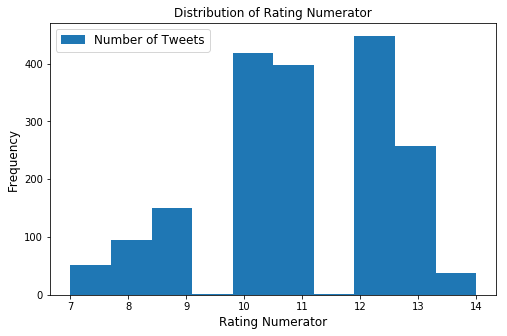

More than 1900 records have rating numerator below 250.


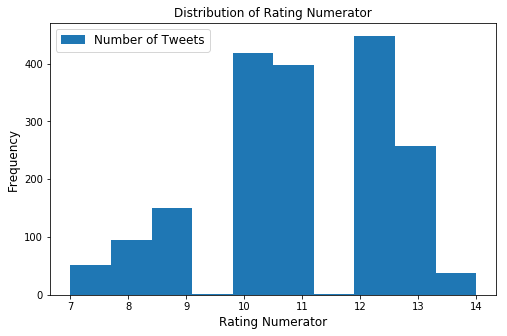

Still, more than 1900 records has rating numerator below 25.


In [56]:
# Plot the distribution of rating numerator values
twitter_archive_master.rating_numerator.plot(kind='hist',
                                             label='Number of Tweets',
                                             figsize=(8,5))

plt.legend(fontsize=12)
plt.title('Distribution of Rating Numerator', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Rating Numerator', fontsize=12)
plt.show();
print('More than 1900 records have rating numerator below 250.')

# Plot the distribution of rating numberator values again.
# This is because most records have numerator below 250.
twitter_archive_master = twitter_archive_master[twitter_archive_master.
                                                    rating_numerator < 250]
twitter_archive_master.rating_numerator.plot(kind='hist',
                                             label='Number of Tweets',
                                             figsize=(8,5))

plt.legend(fontsize=12)
plt.title('Distribution of Rating Numerator', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Rating Numerator', fontsize=12)
plt.show();
print('Still, more than 1900 records has rating numerator below 25.')





The following figure shows that there are exceptionally few records with a rating below 6.5. However; the lowest common rating for a dog seems to be 7. The figure also indicates that around 75% of the ratings are equal to or greater than 10. Furthermore; in most of the cases the rating denominators are 10.


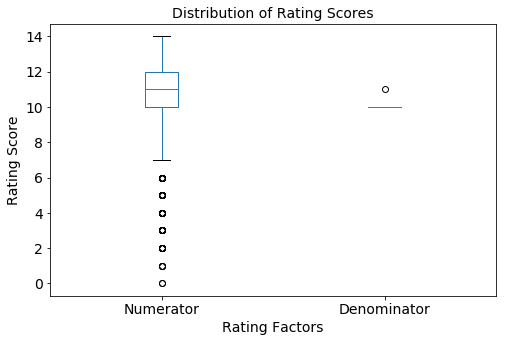

Rating numerator almost always has a value between 6.5 and 16.
Rating denominator almost always has a value 10.


In [45]:
# Get records with rating numerators below 25
twitter_archive_master = twitter_archive_master[
    twitter_archive_master.rating_numerator < 25]

# Get numerator and denominator variables only 
numerator_vs_denominator = twitter_archive_master[
    ['rating_numerator', 'rating_denominator']]

numerator_vs_denominator = numerator_vs_denominator.rename(
    columns={'rating_numerator': 'Numerator', 
             'rating_denominator': 'Denominator'})

# Plot the distribution of rating numerators below 25
numerator_vs_denominator.plot(kind='box', figsize=(8, 5))
plt.title('Distribution of Rating Scores', fontsize=14)
plt.ylabel('Rating Score', fontsize=14)
plt.xlabel('Rating Factors', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname='My_data/cretated_graphs/Distribution_of_rating_scores.png')
plt.show();
print('Rating numerator almost always has a value between 6.5 and 16.')
print('Rating denominator almost always has a value 10.')

The following figure shows that the most frequent ratings are between 10 and 13 (accumulated towards the right). In fact, around 84% of the ratings are above 10. This indicates that, ratings of WeRateDogs are more of positive.

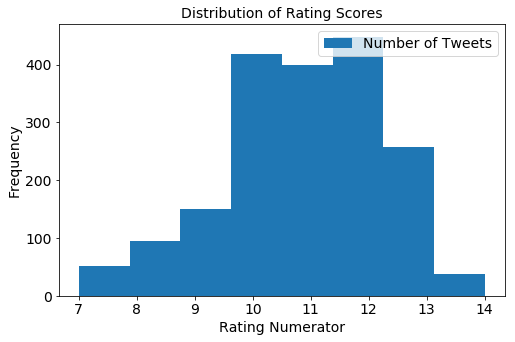

Still, 1859 records has rating numerator between 6.5 and 16.
The distribution seems left skewed. This indicates that their ratings are more positive.
This is because, 83.92% of the ratings are above 10.


In [46]:
# Plot the distribution of rating numberator values between 6.5 and 16
numerator_vs_denominator = numerator_vs_denominator[
    (numerator_vs_denominator.Numerator < 16) & 
    (numerator_vs_denominator.Numerator > 6.5)]

numerator_vs_denominator.Numerator.plot(kind='hist',
                                        bins=8, figsize=(8, 5),
                                        label='Number of Tweets')
plt.legend(fontsize=14)
plt.title('Distribution of Rating Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Rating Numerator', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname='My_data/cretated_graphs/Frequency_distribution_of_rating_scores.png')
plt.show();
print('Still, {} records has rating numerator between 6.5 and 16.'.
      format(len(numerator_vs_denominator)))
print('The distribution seems left skewed. '+ 
      'This indicates that their ratings are more positive.')

# Get the proportion of tweets with rating greater than 10
percentage_above_10 = ((numerator_vs_denominator.Numerator.value_counts()/
                         len(numerator_vs_denominator))*100).sort_index()
print('This is because, {0:.2f}% of the ratings are above 10.'.
      format(percentage_above_10[10:].sum()))



### Which Dog Breeds are the Most Popular on WeRateDogs?

We have seen that ratings of WeRateDogs are positive, but which dog breeds are the most popular? Tweets may not contain information about the breed of a dog in the tweet. Hence; dog’s breed was predicted from its picture in the tweet. As a result of this, tweets with prediction confidence greater than 85% were filtered. (371 tweets satisfy this criterion) Having said that, popularity can be defined from two perspectives.


In [47]:
# Get dog breed predictions with confidence level > 85%
confident_predictions = twitter_archive_master_copy[(
    (twitter_archive_master_copy.p1_dog == True) & 
    (twitter_archive_master_copy.p1_conf > 0.85))]

print('{} dog breed predictions have > 85% confidence level.'.
      format(len(confident_predictions)))

368 dog breed predictions have > 85% confidence level.


The number of tweets that are posted about a certain dog breed. The figure below shows that Golden Retriever is the most tweeted dog breed. Tweets about Golden Retriever take around 14% of the total tweets. Hence; from the number of tweets perspective, Golden Retriever is the most popular dog breed on WeRateDogs.

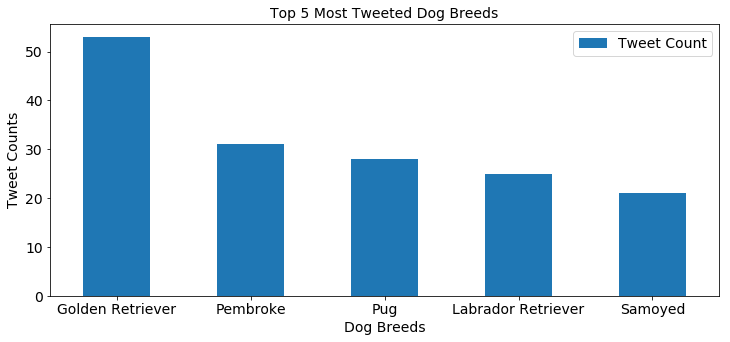

Based on number of tweets; Golden Retriever, Pembroke, Pug, Labrador Retriever, and Samoyed are the most popular.


In [48]:
# Get WeRateDogs' popular dog breed
most_tweeted_breeds = confident_predictions.groupby(
    ['p1'], as_index=False)['tweet_id'].count().sort_values(
    ascending=False, by='tweet_id')

# Get the top 5 rows
top_5_most_tweeted_breeds = most_tweeted_breeds.head(5)
top_5_most_tweeted_breeds.index = top_5_most_tweeted_breeds['p1'].str.replace(
    '_', ' ').str.title().tolist()

# Plot the top 5 most popular breeds 
top_5_most_tweeted_breeds = top_5_most_tweeted_breeds.rename(
    columns={'tweet_id': 'Tweet Count'})
top_5_most_tweeted_breeds.plot(kind='bar', figsize=(12,5), rot=0)
plt.legend(fontsize=14)
plt.title('Top 5 Most Tweeted Dog Breeds', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.xlabel('Dog Breeds', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname='My_data/cretated_graphs/The_most_tweeted_dog_breeds.png')
plt.show();
print('Based on number of tweets; {}, {}, {}, {}, and {} are the most popular.'.
      format(*top_5_most_tweeted_breeds.index.tolist()))

The number of likes a certain dog breed in a tweet gets. It is important to note that, this metric of popularity can be biased by the content of the tweeted text. This is because some of the tweets posted by WeRateDogs are funny, and the number of likes for a tweet may not necessarily be because of the dog in the tweet. As shown in the figure below Golden Retrievers are still the most popular breeds when considering the number of likes each breed got. The total number of likes that Golden Retrievers got is around 18% of the total likes. Hence; when considering the number of likes tweets get, tweets about Golden Retrievers are the most popular on WeRateDogs.

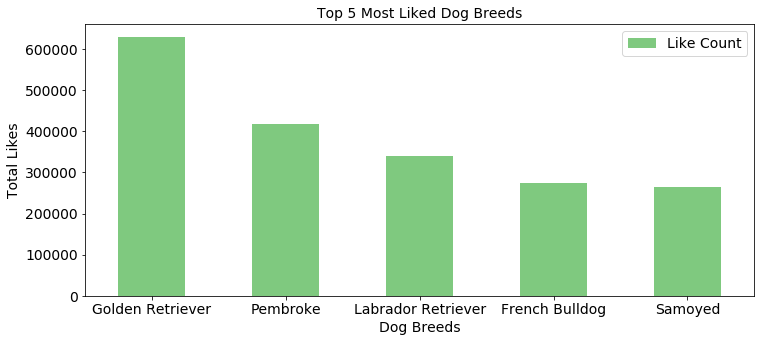

Based on favorite counts; Golden Retriever, Pembroke, Labrador Retriever, French Bulldog, and Samoyed are the most popular.


In [60]:
# Get viewers' popular dog breed
most_favorite_breeds = confident_predictions.groupby(
    ['p1'], as_index=False)['favorite_count'].sum().sort_values(
    ascending=False, by='favorite_count')

# Get the top 5 rows
top_5_most_favorite_breeds = most_favorite_breeds.head(5)
top_5_most_favorite_breeds.index = top_5_most_favorite_breeds['p1'].str.replace(
    '_', ' ').str.title().tolist()

# Plot the top 5 most popular breeds 
top_5_most_favorite_breeds = top_5_most_favorite_breeds.rename(
    columns={'favorite_count': 'Like Count'})
top_5_most_favorite_breeds.plot(kind='bar', figsize=(12,5), colormap='Accent', rot=0)
plt.title('Top 5 Most Liked Dog Breeds', fontsize=14)
plt.legend(fontsize=14)
plt.ylabel('Total Likes', fontsize=14)
plt.xlabel('Dog Breeds', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname='My_data/cretated_graphs/The_most_liked_dog_breeds.png')
plt.show();
print('Based on favorite counts; {}, {}, {}, {}, and {} are the most popular.'
      .format(*top_5_most_favorite_breeds.index.tolist()))



Have the Ratings of WeRateDogs Been Consistent Through Time?

Besides being a positive rating platform, what does their ratings trend look like? This question is important because, it is important to know when this positive rating was started. If there is consistency in their ratings throughout the years, then they could be deliberately making their ratings positive.


In [65]:
# Get the original master data
twitter_archive_master = twitter_archive_master_copy

# Get rows having rating numberator values between 6.5 and 16
twitter_archive_master = twitter_archive_master[
    (twitter_archive_master.rating_numerator < 16) & 
    (twitter_archive_master.rating_numerator > 6.5)]

# Get ratings sorted by time
time_vs_rating = twitter_archive_master[
    ['timestamp', 'rating_numerator']].sort_values(by='timestamp')

# For ease of analysis, convert timestamp to date
time_vs_rating.timestamp = time_vs_rating.timestamp.dt.date

# Group data on similar days togather.
# Represent ratings of the day using their median 
time_vs_rating = time_vs_rating.groupby('timestamp').rating_numerator.median()

# Compute 30 days moving average of ratings
time_vs_rating = time_vs_rating.rolling(window=30).mean()
time_vs_rating.name = ' Average every 30 Days'
time_vs_rating.index = pd.to_datetime(time_vs_rating.index)

As the figure below shows, their ratings were continuously increasing throughout the years. Hence; the higher positive ratings do not seem random; rather, seem to be deliberate as there is consistency.

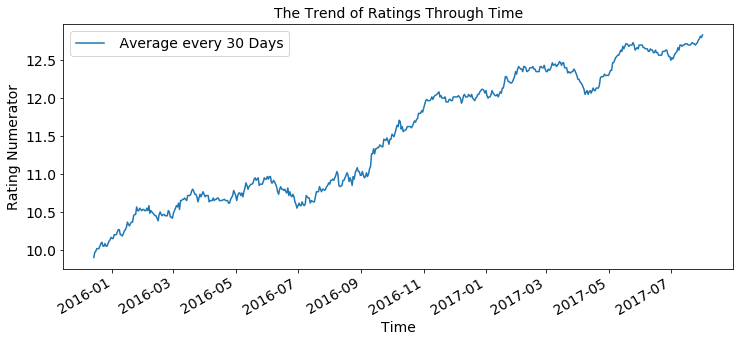

Dogs ratings are positively increasing with time .


In [67]:
# Plot the time series data
time_vs_rating.plot(figsize=(12,5))
plt.legend(fontsize=14)
plt.title('The Trend of Ratings Through Time', fontsize=14)
plt.ylabel('Rating Numerator', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(fname='My_data/cretated_graphs/Ratings_through_time.png')
plt.show();

print('Dogs ratings are positively increasing with time .')

<a id='conc'></a>
# Conclusion

The above analysis results indicate, the real reasons behind the popularity of WeRateDogs. Their ratings, in majority of the cases, were positive.  The other finding was about the most popular dog breed. Results show that Golden Retrievers are the most tweeted and liked dog breeds.
